# Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("C:\\Users\\Neil\\NCI\\DM&ML1\\DM_Project\\Betting.csv",encoding='ANSI')

In [3]:
df.head()

,Tourney_index,Player2,Player1,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best.of,P1_Rank,P2_Rank,P1sets,P2sets,B365P1,B365P2,Year,P1_sets_r,P2_sets_r,P1_game_diff,P2_game_diff,P1_Wins,P1_Loss,P1_Win_Perc,P1_sets_avg,P1_games_avg,P2_Wins,P2_Loss,P2_Win_Perc,P2_sets_avg,P2_games_avg
0,107,Vacek D.,Rafter P.,38,London,Wimbledon,25-06-2001,2000,Outdoor,Grass,1,5,10,934,3,0,0.0,0.0,2001,1.0,0.0,2.666667,-2.666667,36,16,0.692308,0.552431,0.543948,0,1,0.000000,0.000000,-2.500000
1,107,Wessels P.,Agassi A.,38,London,Wimbledon,25-06-2001,2000,Outdoor,Grass,1,5,2,93,3,0,0.0,0.0,2001,1.0,0.0,1.666667,-1.666667,44,12,0.785714,0.611144,0.960229,13,6,0.684211,0.587302,0.486111
2,107,Vicente F.,Novak J.,38,London,Wimbledon,25-06-2001,2000,Outdoor,Grass,1,5,42,58,3,0,0.0,0.0,2001,1.0,0.0,3.333333,-3.333333,20,18,0.526316,0.396667,-0.661667,17,29,0.369565,0.297593,-1.179074
3,107,Puerta M.,Puentes G.,38,London,Wimbledon,25-06-2001,2000,Outdoor,Grass,1,5,99,104,3,0,0.0,0.0,2001,1.0,0.0,2.000000,-2.000000,5,10,0.333333,0.186111,-1.872222,13,13,0.500000,0.413889,-0.618333
4,107,Bruguera S.,Dent T.,38,London,Wimbledon,25-06-2001,2000,Outdoor,Grass,1,5,143,61,3,0,0.0,0.0,2001,1.0,0.0,4.333333,-4.333333,5,10,0.333333,0.283333,-1.041667,23,20,0.534884,0.455556,-0.257937


In [4]:
df.apply(lambda x: sum(x.isnull()),axis=0) # check if missing values are there

Tourney_index    0
Player2          0
Player1          0
ATP              0
Location         0
Tournament       0
Date             0
Series           0
Court            0
Surface          0
Round            0
Best.of          0
P1_Rank          0
P2_Rank          0
P1sets           0
P2sets           0
B365P1           0
B365P2           0
Year             0
P1_sets_r        0
P2_sets_r        0
P1_game_diff     0
P2_game_diff     0
P1_Wins          0
P1_Loss          0
P1_Win_Perc      0
P1_sets_avg      0
P1_games_avg     0
P2_Wins          0
P2_Loss          0
P2_Win_Perc      0
P2_sets_avg      0
P2_games_avg     0
dtype: int64

In [5]:
df = df[df['B365P1'] != 0]

In [6]:
df.head()

,Tourney_index,Player2,Player1,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best.of,P1_Rank,P2_Rank,P1sets,P2sets,B365P1,B365P2,Year,P1_sets_r,P2_sets_r,P1_game_diff,P2_game_diff,P1_Wins,P1_Loss,P1_Win_Perc,P1_sets_avg,P1_games_avg,P2_Wins,P2_Loss,P2_Win_Perc,P2_sets_avg,P2_games_avg
2648,170,Moya C.,Koubek S.,32,Halle,Gerry Weber Open,10-06-2002,250,Outdoor,Grass,1,3,41,20,2,0,2.625,1.444,2002,1.0,0.0,3.0,-3.0,22,25,0.468085,0.322267,-1.047600,36,22,0.620690,0.433912,-0.314583
2649,170,Novak J.,Schuettler R.,32,Halle,Gerry Weber Open,10-06-2002,250,Outdoor,Grass,1,3,23,14,2,0,2.200,1.615,2002,1.0,0.0,3.5,-3.5,46,28,0.621622,0.502778,0.114080,48,24,0.666667,0.540333,0.536667
2650,170,Stepanek R.,Pavel A.,32,Halle,Gerry Weber Open,10-06-2002,250,Outdoor,Grass,1,3,21,150,2,0,1.533,2.375,2002,1.0,0.0,1.5,-1.5,31,21,0.596154,0.519988,0.166969,8,5,0.615385,0.550000,0.441667
2654,170,Santoro F.,Youzhny M.,32,Halle,Gerry Weber Open,10-06-2002,250,Outdoor,Grass,1,3,67,32,2,0,1.800,1.909,2002,1.0,0.0,3.5,-3.5,16,21,0.432432,0.386905,-0.598545,29,23,0.557692,0.431000,-0.495333
2657,170,Kafelnikov Y.,Bjorkman J.,32,Halle,Gerry Weber Open,10-06-2002,250,Outdoor,Grass,1,3,56,6,0,2,2.625,1.444,2002,0.0,1.0,-2.5,2.5,22,21,0.511628,0.455177,-0.296086,51,27,0.653846,0.502579,-0.146131


In [7]:
df = df.reset_index(drop=True)

# Visualization of independent variables

In [8]:
df.corr()

,Tourney_index,ATP,Series,Round,Best.of,P1_Rank,P2_Rank,P1sets,P2sets,B365P1,B365P2,Year,P1_sets_r,P2_sets_r,P1_game_diff,P2_game_diff,P1_Wins,P1_Loss,P1_Win_Perc,P1_sets_avg,P1_games_avg,P2_Wins,P2_Loss,P2_Win_Perc,P2_sets_avg,P2_games_avg
Tourney_index,1.000000,-0.023531,0.020999,0.005823,0.007803,-0.005907,-0.012427,0.002965,0.004541,0.077022,0.076126,0.997744,-0.003180,0.003070,-0.002411,0.002411,0.003535,-0.017823,-0.010793,0.021416,0.032999,-0.003558,-0.018496,-0.015193,0.020462,0.030359
ATP,-0.023531,1.000000,0.005104,0.003939,-0.039690,-0.004338,-0.000667,-0.002202,-0.011525,-0.018640,-0.012522,-0.088330,0.004491,-0.004556,0.004900,-0.004900,0.041990,0.011757,0.039587,0.037417,0.044457,0.035123,0.008608,0.034960,0.032354,0.042635
Series,0.020999,0.005104,1.000000,-0.096877,0.890490,-0.082873,-0.081471,0.219980,0.244746,0.137084,0.132119,0.021366,-0.010658,0.010795,-0.011352,0.011352,0.164501,0.016308,0.155940,0.161522,0.154974,0.169020,0.019316,0.155630,0.161633,0.151758
Round,0.005823,0.003939,-0.096877,1.000000,-0.074332,-0.151850,-0.166015,-0.014602,-0.018664,-0.002953,0.002136,0.006073,0.002266,-0.002793,0.004457,-0.004457,0.335730,0.107474,0.303731,0.307708,0.295724,0.323138,0.099146,0.295309,0.297847,0.287643
Best.of,0.007803,-0.039690,0.890490,-0.074332,1.000000,-0.025491,-0.032176,0.246072,0.271288,0.137124,0.129349,0.010962,-0.010686,0.010614,-0.010958,0.010958,0.047467,-0.035397,0.047265,0.056320,0.053988,0.055431,-0.029447,0.049517,0.059767,0.055271
P1_Rank,-0.005907,-0.004338,-0.082873,-0.151850,-0.025491,1.000000,0.038699,-0.153104,0.133573,0.203161,-0.185012,-0.005787,-0.152755,0.152744,-0.164543,0.164543,-0.428830,-0.407209,-0.506516,-0.443491,-0.291442,-0.054078,-0.032529,-0.057572,-0.057314,-0.051283
P2_Rank,-0.012427,-0.000667,-0.081471,-0.166015,-0.032176,0.038699,1.000000,0.144382,-0.166416,-0.197968,0.216167,-0.012409,0.166758,-0.166805,0.176541,-0.176541,-0.060716,-0.034594,-0.063008,-0.060003,-0.054691,-0.452903,-0.429644,-0.532659,-0.466144,-0.302602
P1sets,0.002965,-0.002202,0.219980,-0.014602,0.246072,-0.153104,0.144382,1.000000,-0.720705,-0.331372,0.350187,0.003340,0.906398,-0.906142,0.850991,-0.850991,0.260957,0.085744,0.250662,0.251132,0.240270,-0.252683,-0.094646,-0.244784,-0.245207,-0.229197
P2sets,0.004541,-0.011525,0.244746,-0.018664,0.271288,0.133573,-0.166416,-0.720705,1.000000,0.351179,-0.323375,0.005435,-0.906052,0.906309,-0.851306,0.851306,-0.243351,-0.094261,-0.228136,-0.227560,-0.218225,0.267541,0.092345,0.261476,0.261710,0.240147
B365P1,0.077022,-0.018640,0.137084,-0.002953,0.137124,0.203161,-0.197968,-0.331372,0.351179,1.000000,-0.287312,0.077769,-0.342064,0.342086,-0.368626,0.368626,-0.267104,-0.155837,-0.285804,-0.271590,-0.229864,0.495612,0.024783,0.426129,0.464022,0.465903


C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Neil\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)

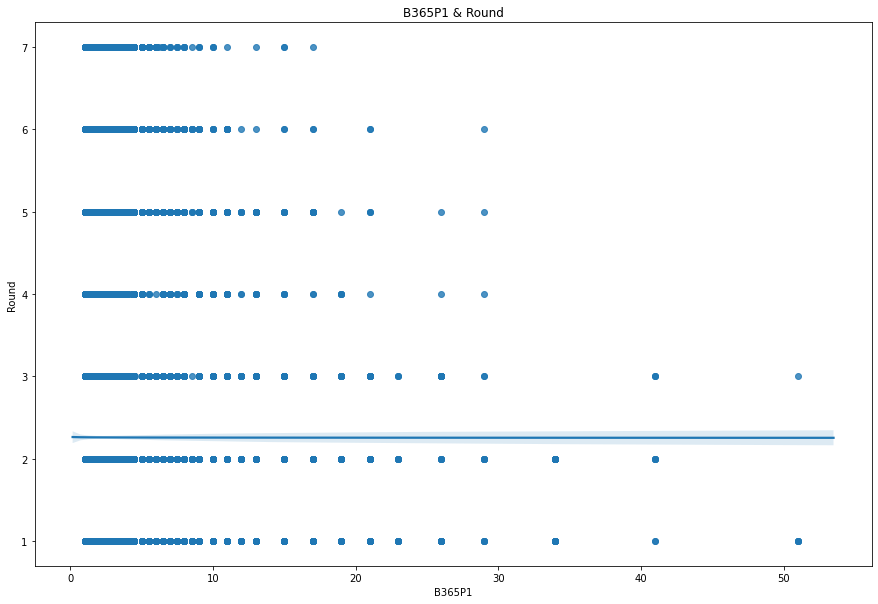

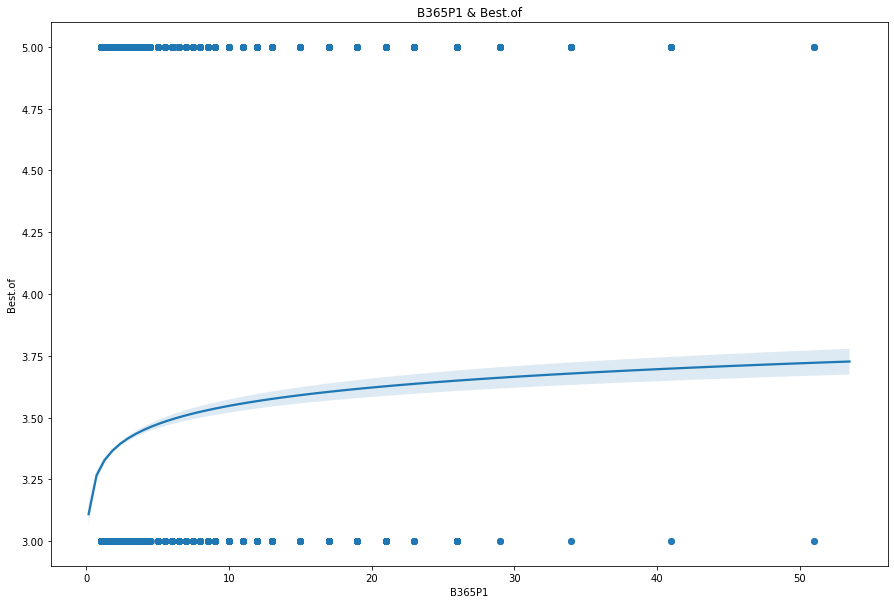

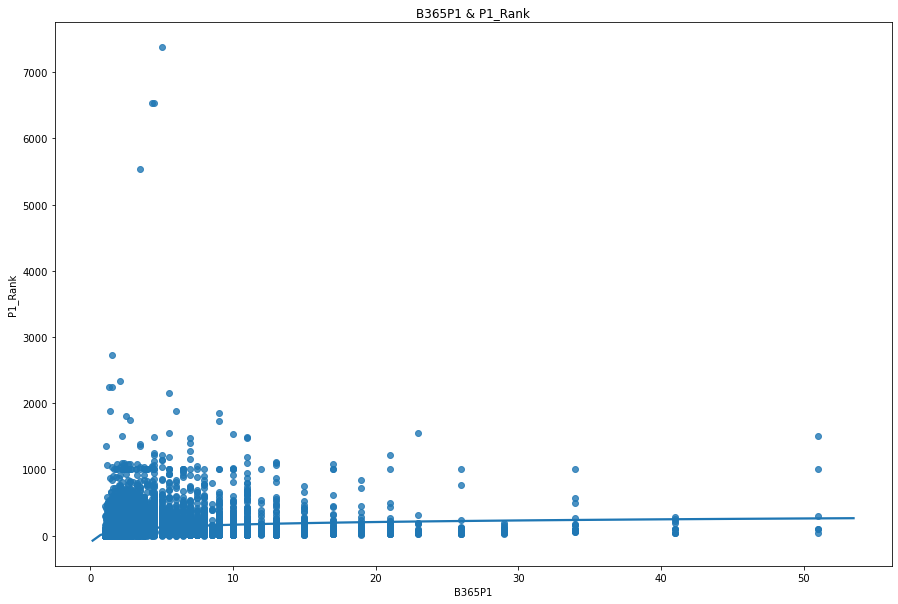

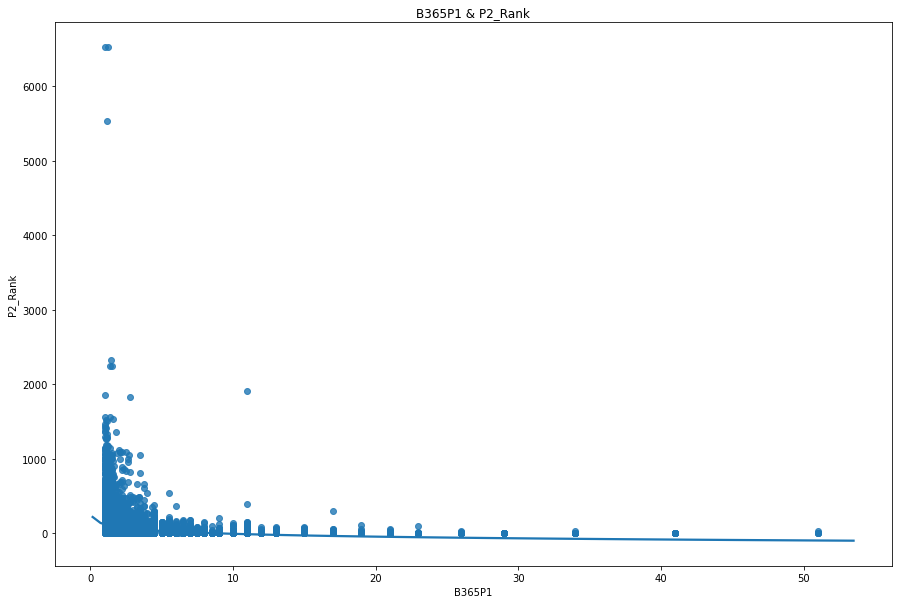

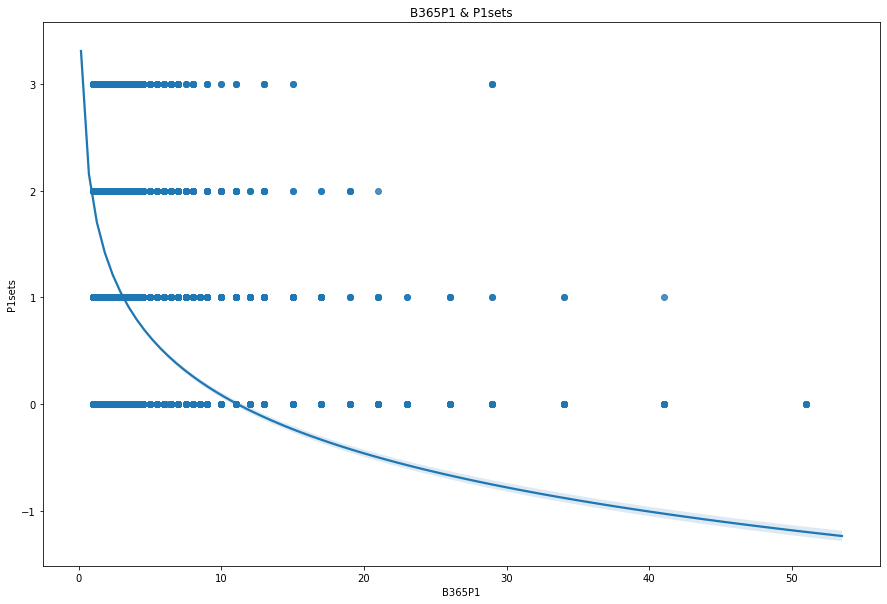

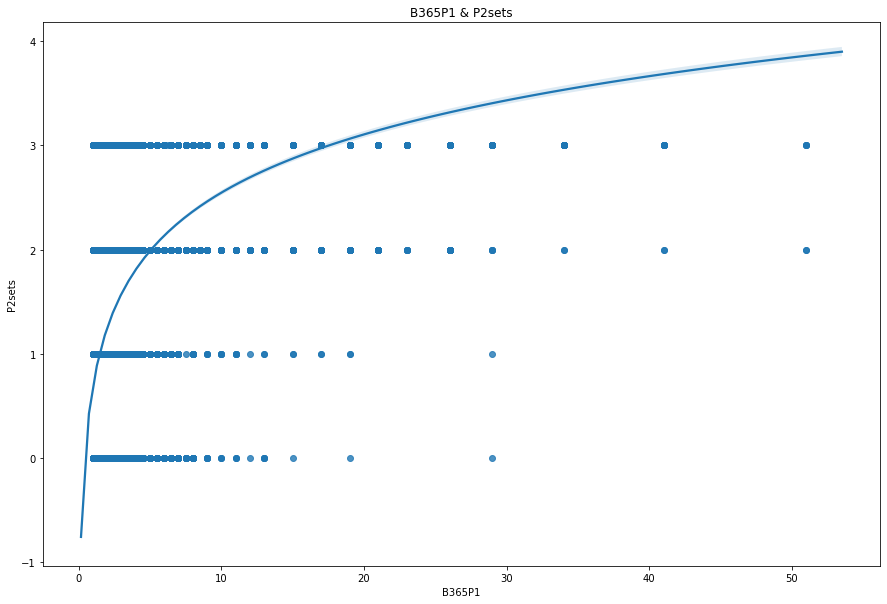

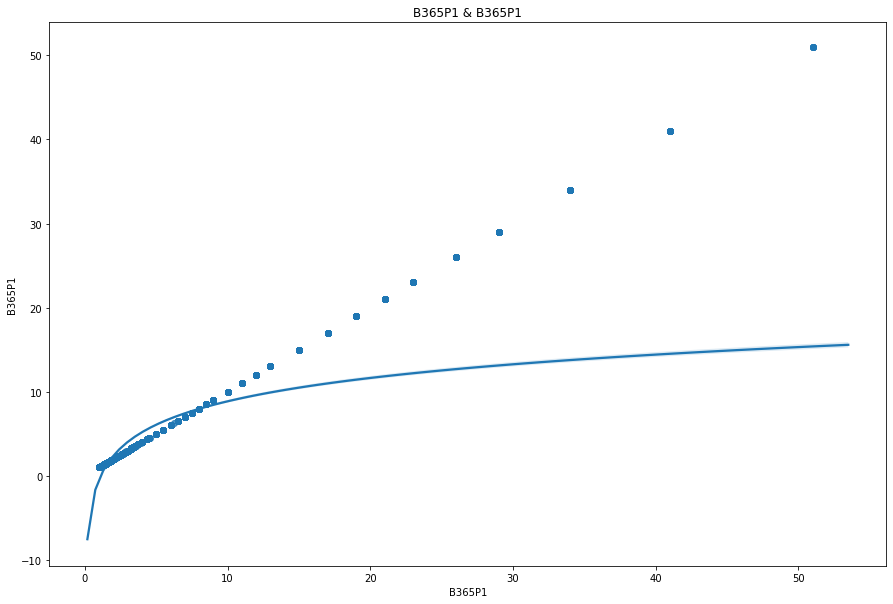

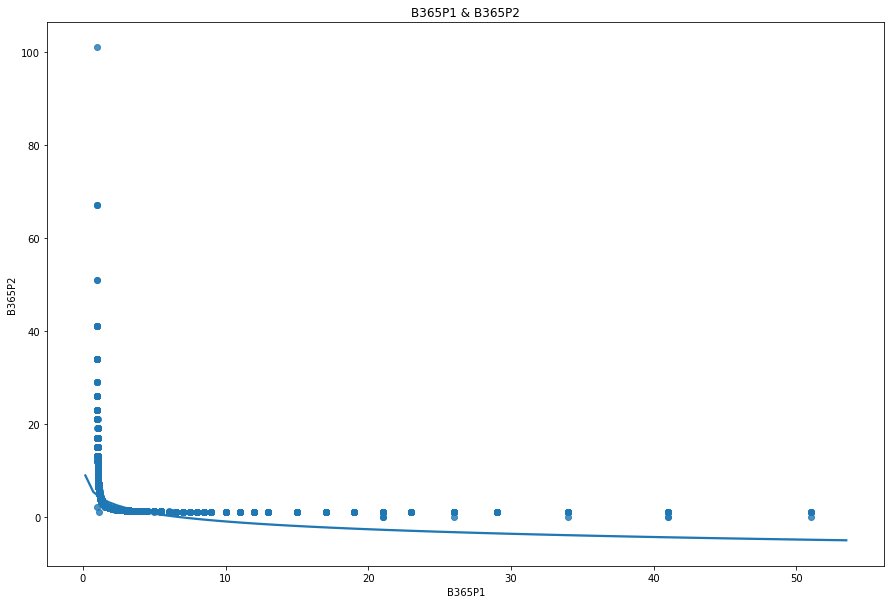

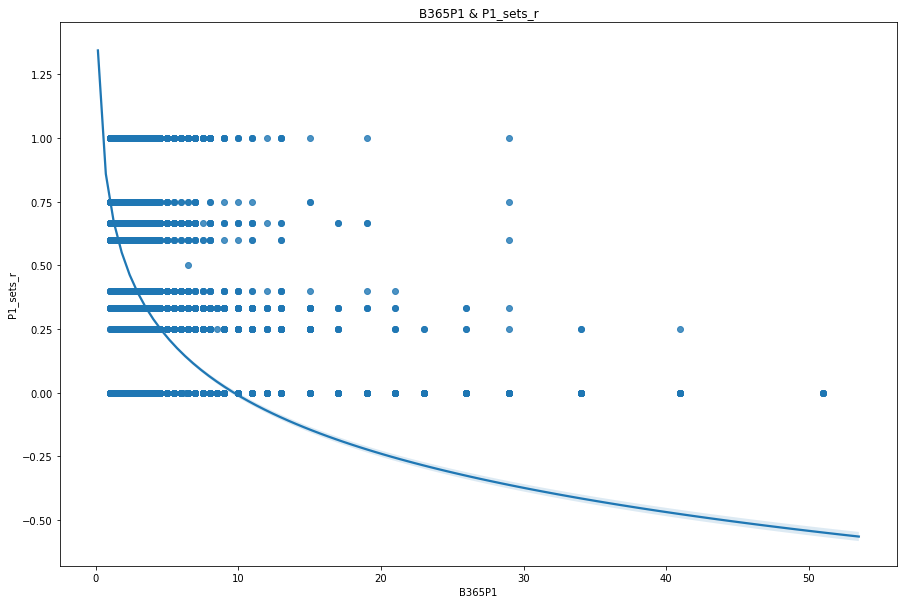

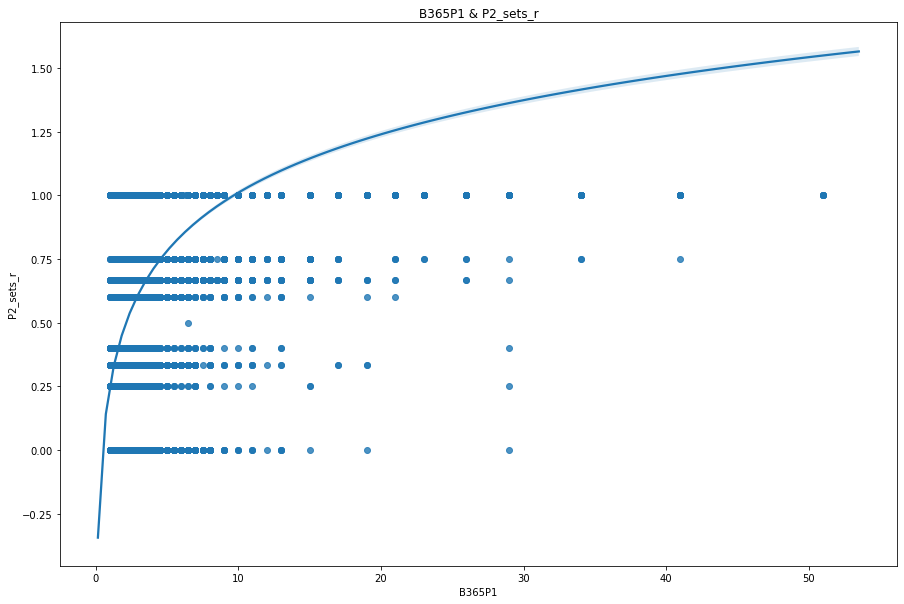

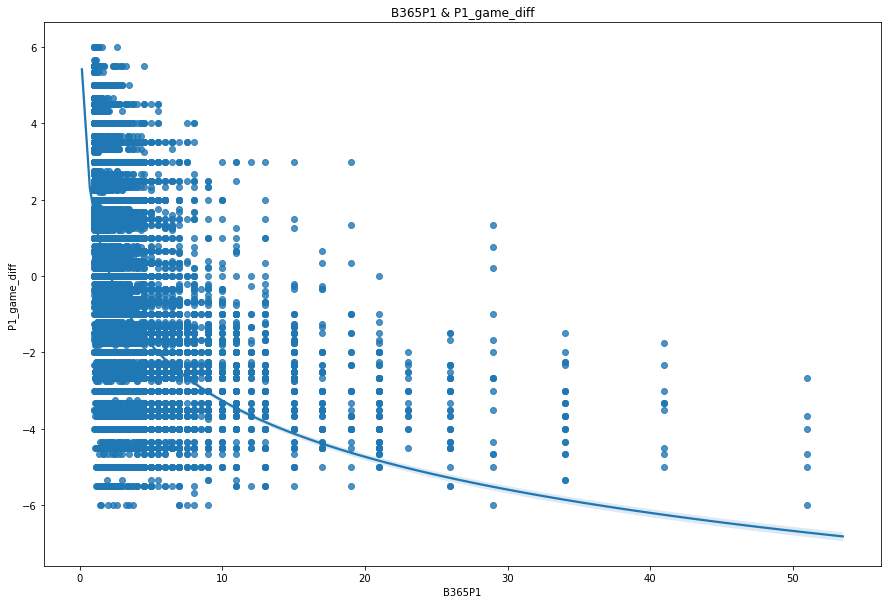

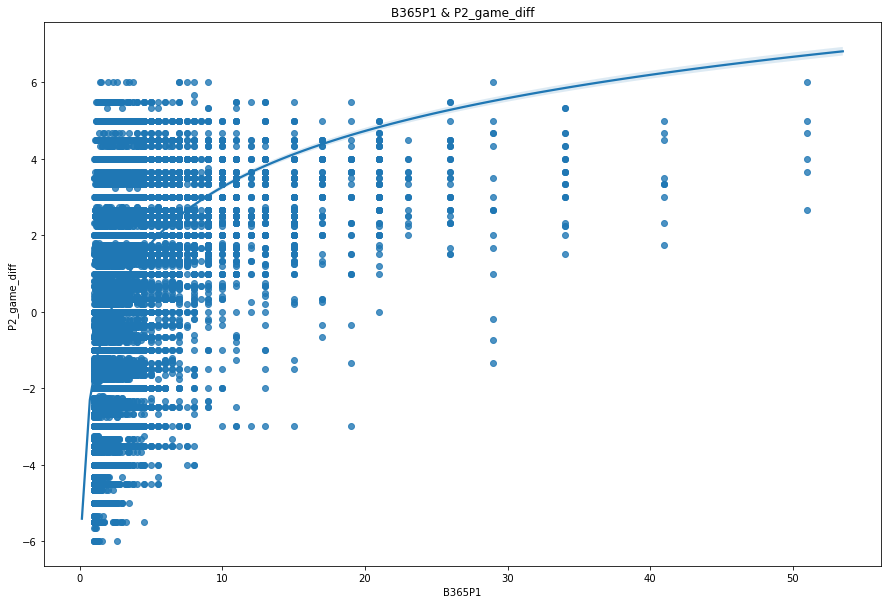

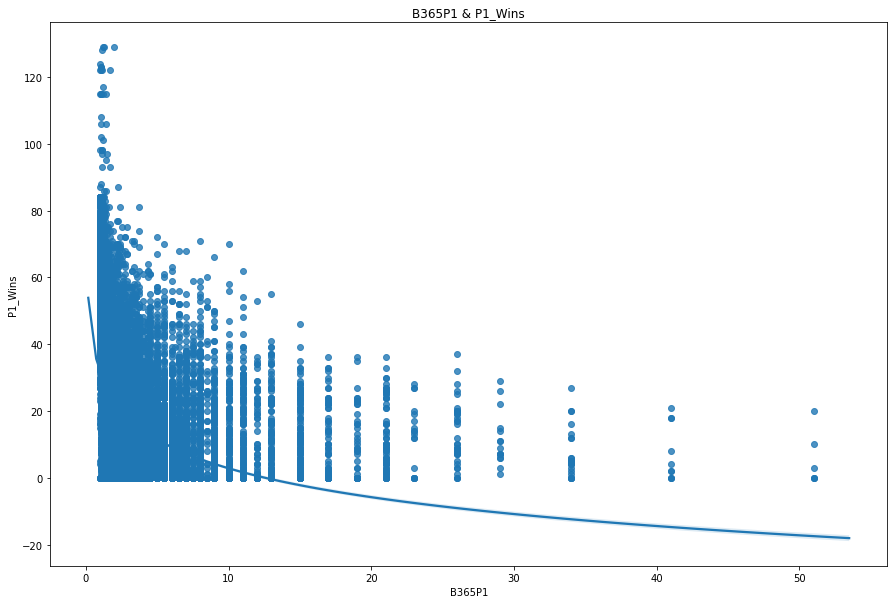

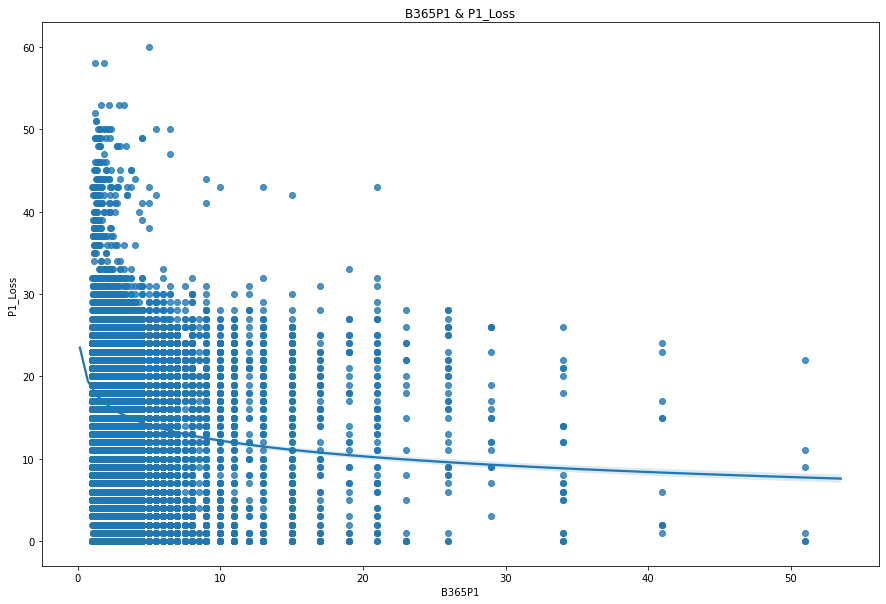

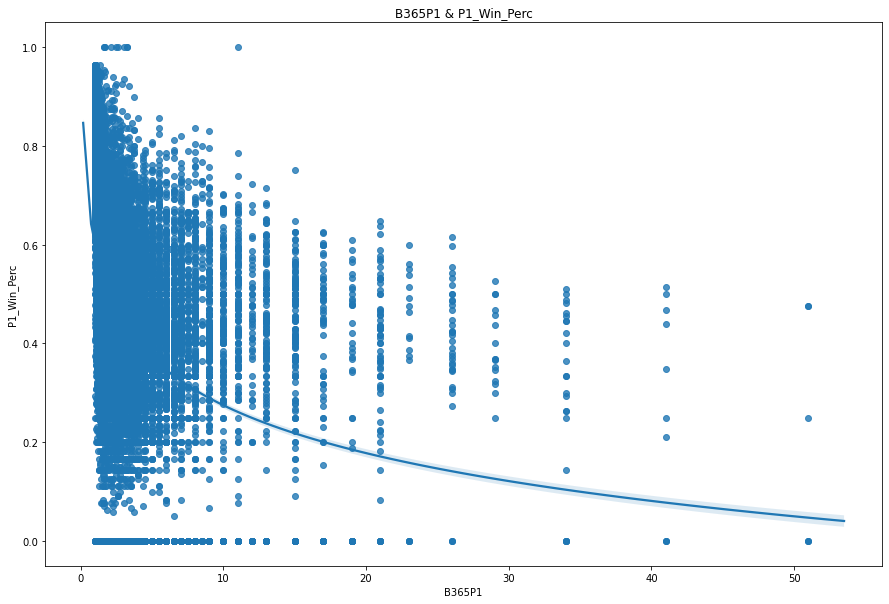

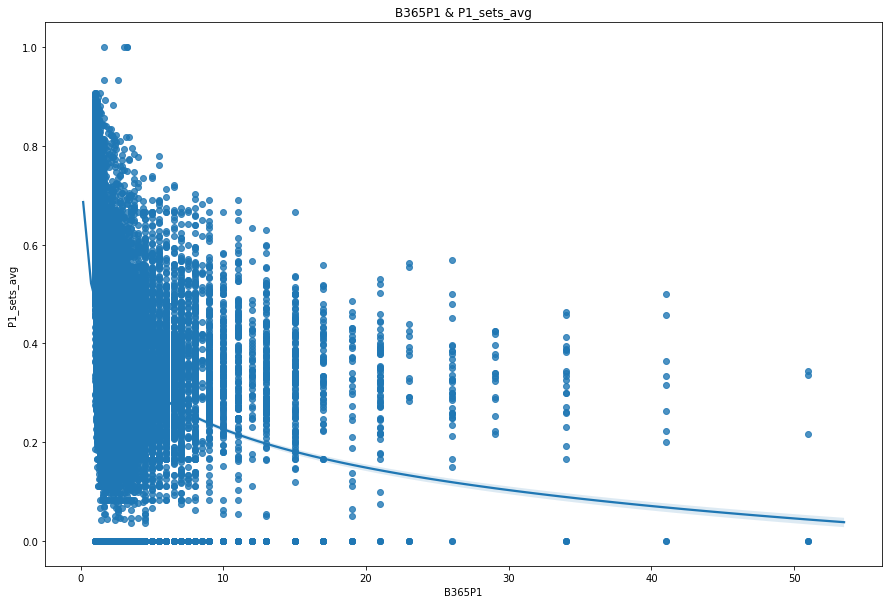

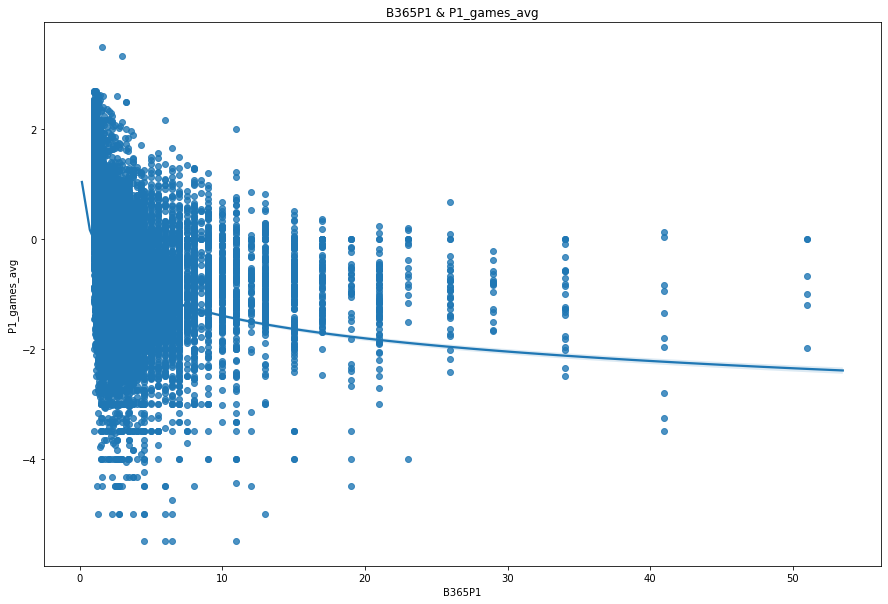

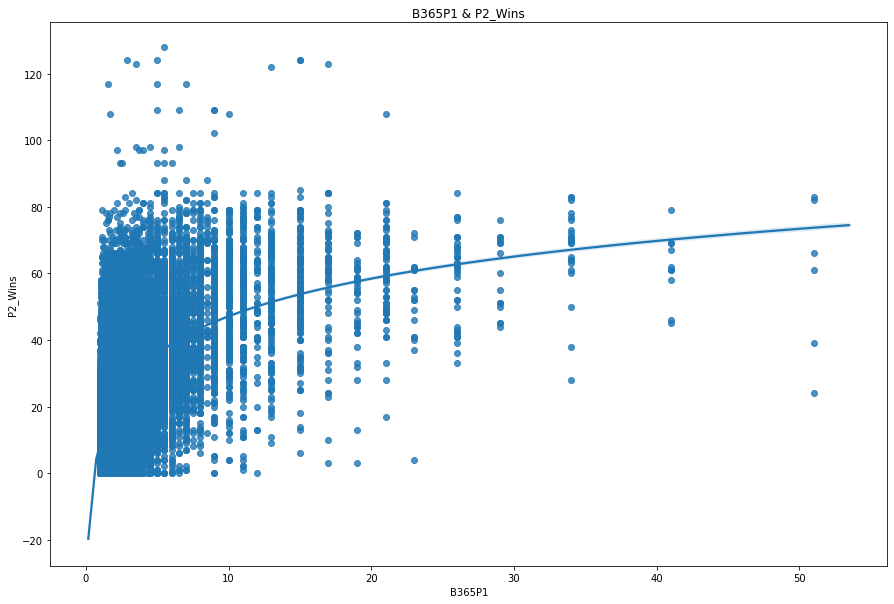

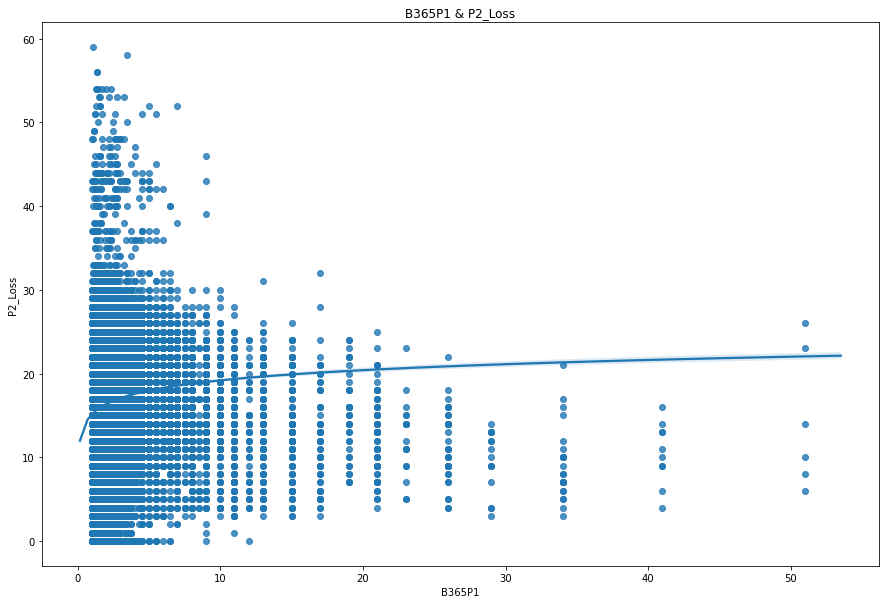

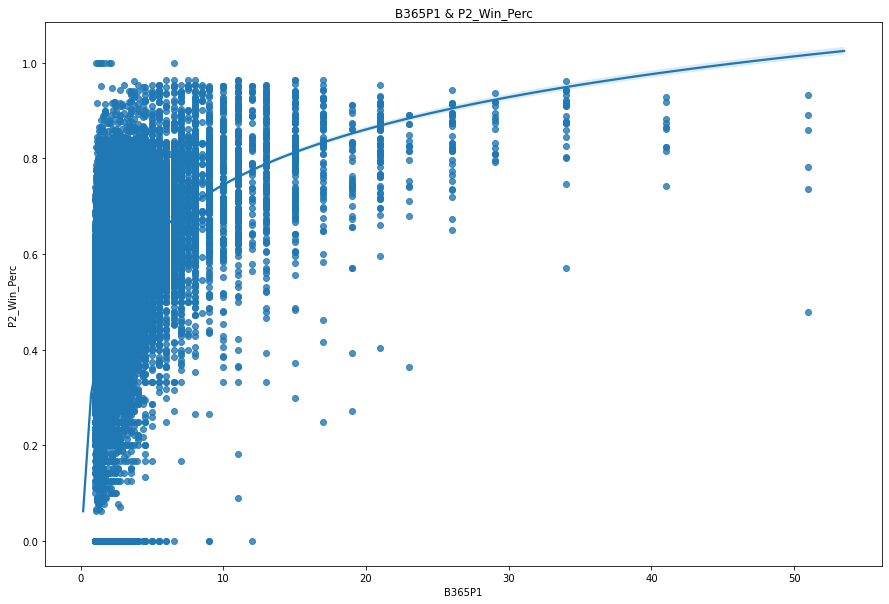

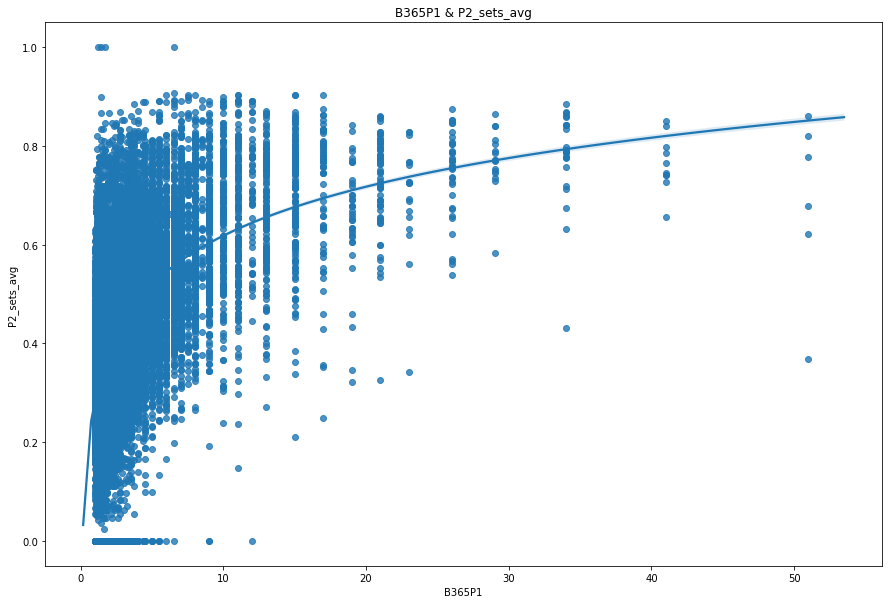

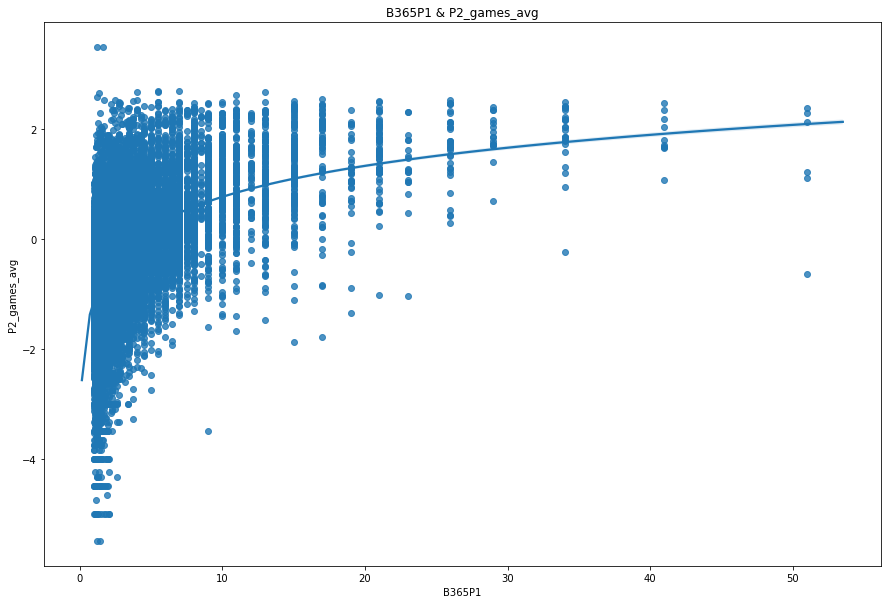

In [9]:
# Visualize the relationships within the dataset
x_col = "B365P1"
y_columns = df[df.columns[~df.columns.isin(['Tourney_index','Player2','Player1','ATP','Location','Tournament','Date','Series','Court','Surface','Year'])]]
#y_columns = df.loc[:, df.columns != ['Tourney_index','Player2','Player1','ATP','Location','Tournament','Date','Series','Court','Surface','Year']]
for y_col in y_columns:
    figure = plt.figure
    plt.figure(figsize = (15,10))
    ax = sns.regplot(x=x_col, y=y_col, data = df, logx = True)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} & {}".format(x_col, y_col))
plt.show()

# Modeling

In [10]:
X = df[['Round','Best.of','P1_sets_r','P2_sets_r','P1_game_diff','P2_game_diff','P1_Wins','P1_Loss','P1_Win_Perc','P1_sets_avg','P1_games_avg','P2_Wins','P2_Loss','P2_Win_Perc','P2_sets_avg','P2_games_avg']]

In [11]:
y1 = df['B365P1']

In [12]:
y2 = df['B365P2']

In [13]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y1,random_state=0)

In [14]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y2,random_state=0)

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [16]:
lr = LinearRegression().fit(X_train1,y_train1)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
print('Cross-validation (accuracy)',cross_val_score(lr,X_test1,y_test1,cv=5))
print('Cross-validation (R2)',cross_val_score(lr,X_test1,y_test1,cv=5,scoring='r2'))

Cross-validation (accuracy) [0.45069804 0.48380928 0.44624717 0.48616305 0.50423375]
Cross-validation (R2) [0.45069804 0.48380928 0.44624717 0.48616305 0.50423375]


In [19]:
from sklearn.dummy import DummyRegressor

In [20]:
lr_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train1,y_train1)

In [21]:
lr_pred = lr.predict(X_test1)

In [22]:
lr_pred_dummy = lr_dummy_mean.predict(X_test1)

In [23]:
lr.score(X_test1,y_test1)

0.47419969404711737

In [24]:
print("R2 Score (dummy): {:.2f}".format(r2_score(y_test1, lr_pred_dummy)))
print("R2 Score (linear model): {:.2f}".format(r2_score(y_test1, lr_pred)))

R2 Score (dummy): -0.00
R2 Score (linear model): 0.47


In [25]:
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test1, lr_pred_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test1, lr_pred)))

Mean squared error (dummy): 8.04
Mean squared error (linear model): 4.23


In [26]:
# Cross-validation
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [27]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train1, y_train1)

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train1, y_train1)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   19.1s finished


Best Score:  0.4761871427822716
Best Params:  {'alpha': 0.001, 'l1_ratio': 1}


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf1 = RandomForestRegressor()
rf1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
rf2 = RandomForestRegressor()
rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
print(rf1.feature_importances_)

[0.01511829 0.04596878 0.00631433 0.00411508 0.03305891 0.02814495
 0.09860662 0.02226933 0.12930463 0.03851621 0.03839779 0.04577903
 0.01817694 0.20019059 0.04324991 0.23278863]


In [43]:
print(rf2.feature_importances_)

[0.01192677 0.04463766 0.0034501  0.00470283 0.0335865  0.03417545
 0.05711419 0.01882469 0.16735586 0.0543663  0.24025201 0.07316142
 0.02434704 0.14592907 0.04157496 0.04459515]


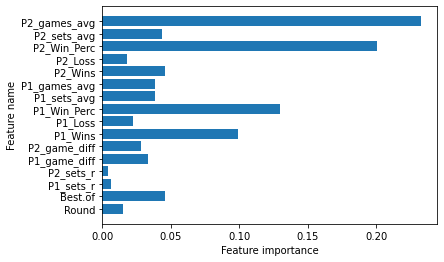

In [44]:
# plot frature importance
n_features = X_train1.shape[1]
feature_names = list(X_train1.columns)
plt.figure()
plt.barh(range(n_features), rf1.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(n_features), feature_names)
plt.show();

In [45]:
rf1.score(X_test1,y_test1)

0.6874839020006935

In [46]:
rf2.score(X_test2,y_test2)

0.7052362669704548

In [50]:
rf_pred1 = rf1.predict(X_test1)

In [51]:
rf_pred2 = rf2.predict(X_test2)

In [52]:
print("R2 Score (dummy): {:.2f}".format(r2_score(y_test1, lr_pred_dummy)))
print("R2 Score (random forest model): {:.2f}".format(r2_score(y_test1, rf_pred1)))
print("R2 Score (random forest model): {:.2f}".format(r2_score(y_test2, rf_pred2)))

R2 Score (dummy): -0.00
R2 Score (random forest model): 0.69
R2 Score (random forest model): 0.71


In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [61]:
grid_search.fit(X_train1,y_train1)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 31.2min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [55]:
grid_search2.fit(X_train2,y_train2)
grid_search2.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 32.2min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [56]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [57]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [62]:
best_grid1 = grid_search.best_estimator_
print("The best parametor is ",best_grid1)
grid_accuracy = evaluate(best_grid1, X_test1, y_test1)

The best parametor is  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Model Performance
Average Error: 0.7201 degrees.
Accuracy = 76.83%.


In [63]:
best_grid2 = grid_search2.best_estimator_
print("The best parametor is ",best_grid2)
grid_accuracy = evaluate(best_grid2, X_test2, y_test2)

The best parametor is  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Model Performance
Average Error: 0.7182 degrees.
Accuracy = -inf%.


In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1, rf_pred1)

2.511935999321525

### Joining the predicted odds for both the players on the testing data

In [64]:
yhat1 = best_grid1.predict(X_test1)

In [65]:
inp = pd.DataFrame(X_test1)

In [66]:
out = pd.DataFrame(yhat1)

In [67]:
inp_out = pd.concat([inp, out], ignore_index=True)

In [68]:
inp.loc[:,'P1_BettingOdd'] = yhat1 # adding it to testing data

In [69]:
yhat2 = best_grid2.predict(X_test2)

In [70]:
inp1 = pd.DataFrame(inp)

In [71]:
out1 = pd.DataFrame(yhat2)

In [72]:
inp_out1 = pd.concat([inp1, out1], ignore_index=True)

In [73]:
inp1.loc[:,'P2_BettingOdd'] = yhat2 # adding it to inp data

In [74]:
inp1

,Round,Best.of,P1_sets_r,P2_sets_r,P1_game_diff,P2_game_diff,P1_Wins,P1_Loss,P1_Win_Perc,P1_sets_avg,P1_games_avg,P2_Wins,P2_Loss,P2_Win_Perc,P2_sets_avg,P2_games_avg,P1_BettingOdd,P2_BettingOdd
11064,1,3,1.000000,0.000000,5.000000,-5.000000,22,28,0.440000,0.335813,-0.819940,8,12,0.400000,0.319444,-1.379630,1.549428,3.005034
3033,3,3,0.666667,0.333333,1.666667,-1.666667,31,24,0.563636,0.440389,-0.267111,17,16,0.515152,0.404167,-0.738194,1.555946,2.688523
24590,2,5,0.000000,1.000000,-3.333333,3.333333,3,11,0.214286,0.136364,-2.212121,12,19,0.387097,0.320175,-1.055556,3.090794,1.529424
13285,3,3,1.000000,0.000000,2.000000,-2.000000,9,9,0.500000,0.370000,-0.803333,4,11,0.266667,0.180303,-1.618939,1.584881,2.607532
31809,5,3,0.000000,1.000000,-4.500000,4.500000,13,13,0.500000,0.386343,-0.403472,57,25,0.695122,0.587444,0.771000,5.735001,1.172987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19688,2,3,0.000000,1.000000,-2.000000,2.000000,11,10,0.523810,0.495000,-0.190000,29,26,0.527273,0.409615,-0.470192,2.504284,1.640516
31499,2,3,1.000000,0.000000,2.000000,-2.000000,23,21,0.522727,0.386772,-0.614550,21,26,0.446809,0.375617,-0.694136,1.739629,2.196942
7990,1,3,0.000000,1.000000,-4.500000,4.500000,0,4,0.000000,0.166667,-1.833333,16,13,0.551724,0.444872,-0.248932,4.208465,1.325588
10711,2,3,0.666667,0.333333,0.666667,-0.666667,15,21,0.416667,0.316138,-0.985450,29,28,0.508772,0.380843,-0.879598,2.261746,1.713881
